# Bert Ambiguity

## Getting examples

In [1]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from gensim.models import KeyedVectors
from nltk import word_tokenize

from yellowbrick.text import TSNEVisualizer

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/Users/jan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
modernpoems1 = pd.read_csv("../corpora/german_modern_poems_epochpoet.csv")
modernpoems2 = pd.read_csv("../corpora/german_modern_poems_epochyear.csv")

In [3]:
bank = modernpoems1[modernpoems1.poem.str.contains("Bank")]
bank_texts = dict(bank.poem)

In [4]:
bank.sample(1)

,pid,filename,poet,title,year,poem,poemlength,epoch_year,epoch_poet
1687,8526,"Thoma, Ludwig_Pommernbank-Alphabet_1894","Thoma, Ludwig",Pommernbank-Alphabet,1894,Ein großer Wenn man ihn nicht für Kirchen mach...,173,Jahrhundertwende,Jahrhundertwende


Result:
- Millionen waren in der Bank geblieben, Nun durft' ich sie in alle Winde streu'n. (229)
- Die Schiffer an den Rudern sind verdorrt, Als Mumien schlafen sie auf ihrer Bank (383)
- Da gehen Mädchen auf rasiertem Rasen, Da steht wohl eine Bank, man setzt sich hin (891)
- »Bist du glücklich jetzt?« Und hat sich auf die Bank gesetzt (1624)
- Er begann auf eine Bank zu klettern. (1839)
- Herzog Abel schob nichts auf die lange Bank (2909)

In [5]:
# selection of sentences
sentences = ["Millionen waren in der Bank geblieben",
            "Und hat sich auf die Bank gesetzt",
            "Er begann auf eine Bank zu klettern.",
             "Ich bringe mein Geld auf die Bank."]
sentence = "[CLS] " + " ".join(sentences) + " [SEP]"

## Bert Embedding

In [6]:
from bert_embedding import BertEmbedding

bert_embedding = BertEmbedding(model="bert_12_768_12",
                               dataset_name="wiki_multilingual_cased")
result = bert_embedding(sentences)

In [7]:
result[0][0]

['[UNK]', 'Millionen', 'waren', 'in', 'der', 'Bank', 'geblieben', '[UNK]']

In [8]:
bankidx1 = result[0][0].index("Bank")
bank1 = result[0][1][bankidx1]

bankidx2 = result[1][0].index("Bank")
bank2 = result[1][1][bankidx2]

bankidx3 = result[2][0].index("Bank")
bank3 = result[2][1][bankidx3]

bankidx4 = result[3][0].index("Bank")
bank4 = result[3][1][bankidx4]


embeddings = [bank1, bank2, bank3, bank4]
#labels2 = ["Kreditinstitut", "Kreditinstitut", "Möbelstück", "Möbelstück"]
labels = ["Kreditinstitut", "Möbelstück", "Möbelstück", "Kreditinstitut"]

In [9]:
embeddings[3].shape

(768,)

### visualize Bert Embeddings of "Bank"

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


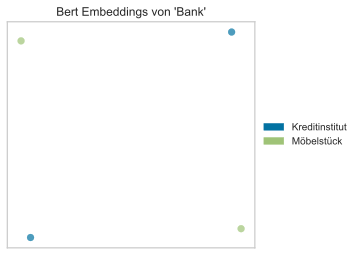

In [10]:
tsne = TSNEVisualizer(decompose_byint=2,
                      size = (400, 300),
                      title="Bert Embeddings von 'Bank'")
tsne.fit(embeddings, labels)
plt.grid(False)
plt.legend(frameon=True)
#plt.savefig("../utils/img/bank_bertembeddings.png", dpi=300)
tsne.show()

## Word2Vec Embeddings

In [11]:
tokenized_sentences = [word_tokenize(s) for s in sentences]

In [12]:
orig_model = Word2Vec(tokenized_sentences, size=300, min_count=1)

model = Word2Vec(size=300, min_count=1)
model.build_vocab(tokenized_sentences)
total_examples = model.corpus_count

pretrained = KeyedVectors.load_word2vec_format("german_model.bin", binary=True)
model.build_vocab([list(pretrained.vocab.keys())], update=True)
model.intersect_word2vec_format("german_model.bin", binary=True, lockf=1.0)
model.train(tokenized_sentences, total_examples=total_examples, epochs=model.iter)

/Users/jan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  # Remove the CWD from sys.path while we load stuff.


(83, 145)

/Users/jan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
No handles with labels found to put in legend.


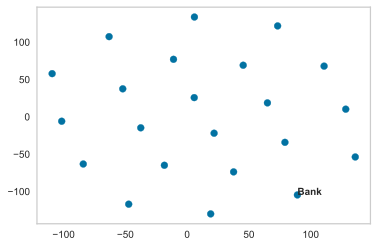

In [13]:
plt.clf()
word2vec = model[orig_model.wv.vocab]

method = TSNEVisualizer(decompose_by=2)
method = TSNE(n_components=2)
dim_red = method.fit_transform(word2vec)


plt.figure(num=1, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(dim_red[:, 0], 
            dim_red[:, 1])
words = list(orig_model.wv.vocab)
for i, word in enumerate(words):
    if word == "Bank":
        plt.annotate(word, xy=(dim_red[i, 0], dim_red[i, 1]), weight="bold")
plt.legend()
plt.grid(False)
plt.show()

/Users/jan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


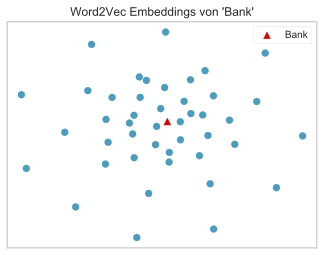

In [15]:
word2vec = model[orig_model.wv.vocab]

tsne2 = TSNEVisualizer(decompose_byint=2, 
                       size = (400,300),
                       title="Word2Vec Embeddings von 'Bank'")
dim_red = tsne2.fit_transform(word2vec)
tsne2.fit(dim_red)
for i, word in enumerate(words):
    if word == "Bank":
        plt.scatter(dim_red[i, 0], 
                    dim_red[i, 1], 
                    marker="^", 
                    color="r", 
                    label="Bank",
                    s=50.0)
        #plt.annotate(word, xy=(dim_red[i, 0], dim_red[i, 1]), weight="bold")
plt.legend(frameon=True)
plt.grid(False)
#plt.figure(num=1, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')
#plt.savefig("../utils/img/bank_word2vecembeddings.png", dpi=300)
tsne2.show()